In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\ML\datasets\placement.csv")

In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

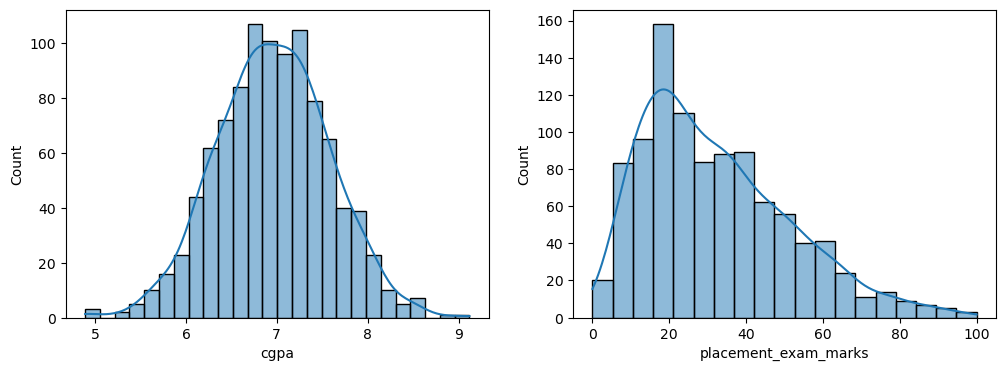

In [5]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

In [6]:
# placement_exam_marks column is right-skewed

df['placement_exam_marks'].skew()

0.8356419499466834

In [16]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

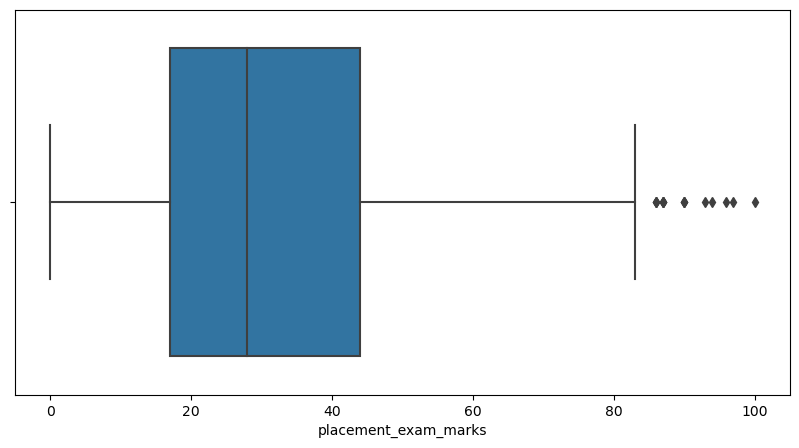

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['placement_exam_marks'])

In [17]:
#finding the IQR
per_25 = df['placement_exam_marks'].quantile(0.25)
per_75 = df['placement_exam_marks'].quantile(0.75)

In [19]:
iqr = per_75 - per_25
iqr

27.0

In [20]:
lower_limit = per_25 - 1.5 * (iqr)
upper_limit = per_75 + 1.5 * (iqr)

In [21]:
lower_limit,upper_limit

(-23.5, 84.5)

In [23]:
# finding the outliers

df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)] 

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


Now that we have found the outliers next we have to handle them

## Trimming

In [28]:
new_df = df[(df['placement_exam_marks'] > lower_limit) & (df['placement_exam_marks'] < upper_limit)] 

In [29]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


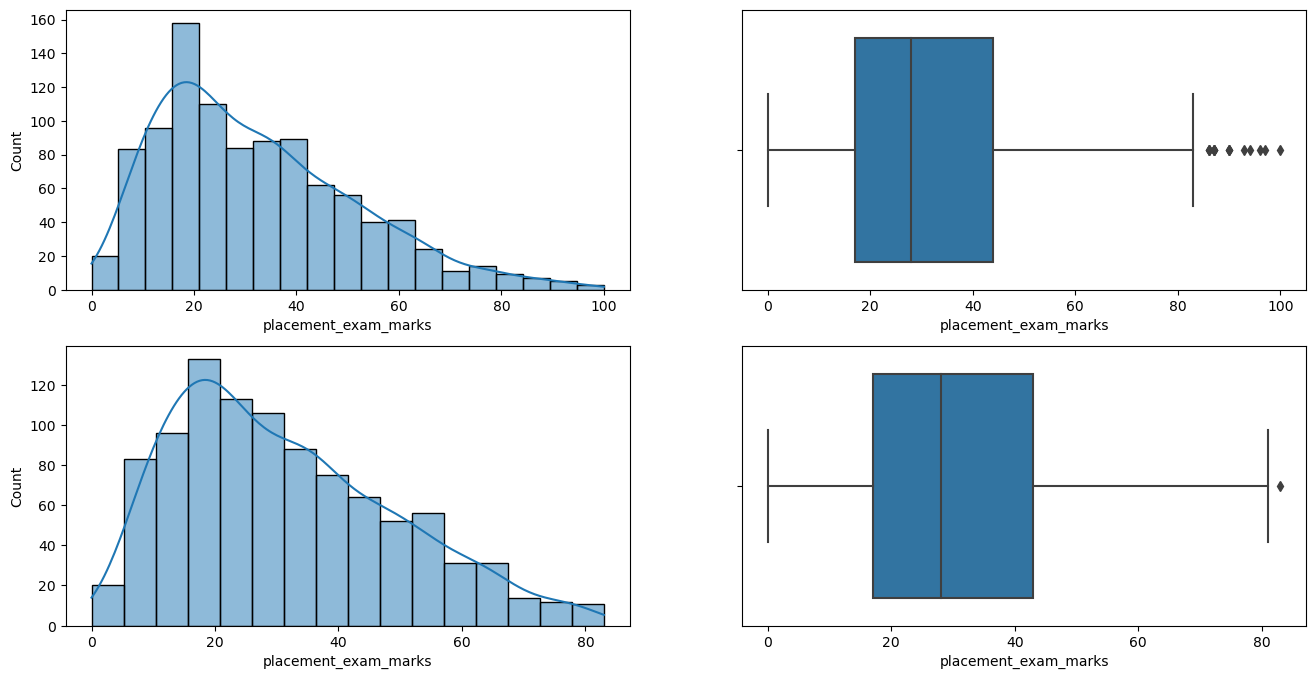

In [35]:
# comparing the data before trimming and after trimming

plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True)
        
plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])  

plt.show()

## Capping

In [36]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [37]:
new_df_cap.shape

(1000, 3)

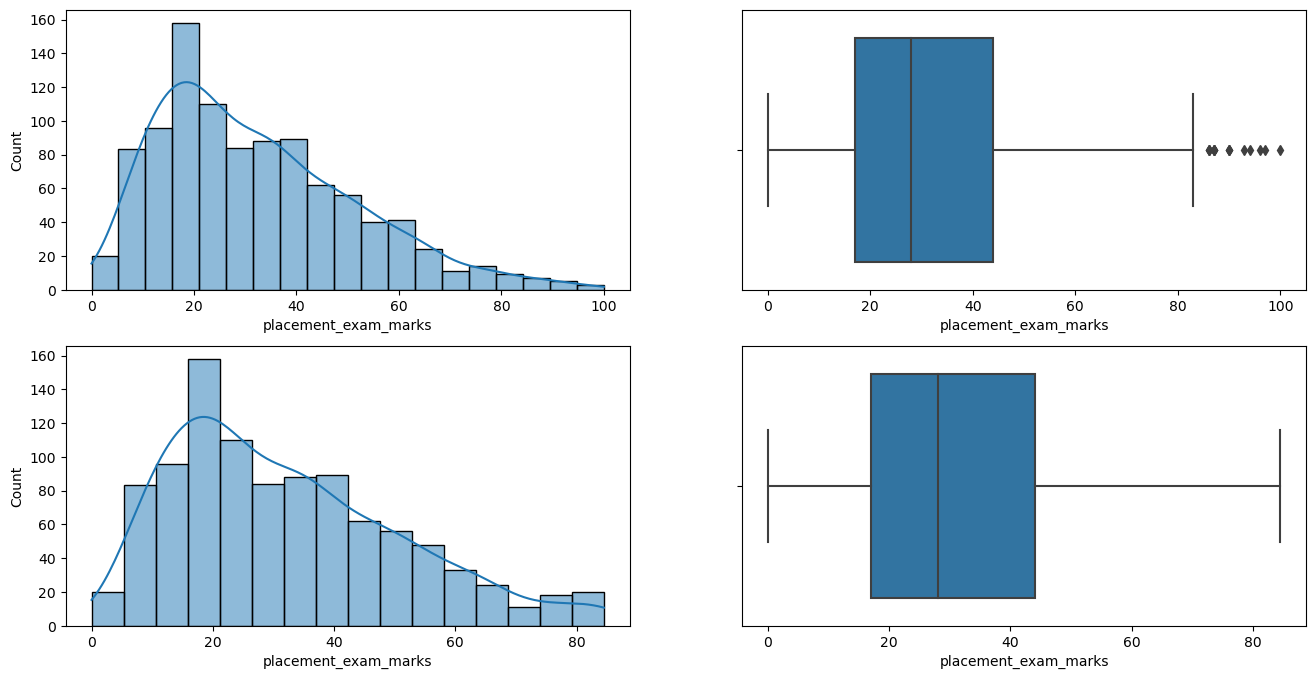

In [40]:
# Comparing the data before ans after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

plt.show()